In [ ]:
 %%HTML
<script src="jquery-3.5.1.min.js"></script>
<script src="test.js"></script>

<center> <h1> Interface d'une structure de données </h1></center>

Une **structure de donnée** est l'association :
* d'un ou plusieurs types servant à contenir des données (des valeurs d'un autre type, en général) ;
* d'algorithmes servant à manipuler ces types.

Exemples de structures de données déjà rencontrées en Python :
* T-uplet (*tuple*) : tableau fixe pouvant contenir plusieurs types de valeurs, dont chaque élément est indexé par un entier. Une fois créé, un tuple ne peut être mis à jour : il est **immutable**.
* Chaîne (*string*) : séquence immutable homogène de caractères Unicode.
* Range : séquence arithmétique de valeurs entières immutable.
* Liste (*list*) : tableau dynamique (mutable) pouvant contenir plusieurs types de valeurs, dont chaque élément est indexé par un entier
* Dictionnaire (*dict*) : tableau dynamique pouvant contenir plusieurs types de valeurs, dont chaque élément est indexé par une variable non mutable (int, float, string, tuple).
* Ensemble (*set*) : Collection mutable **unique** d'objets non mutables et non indexés.

Bien choisir une structure de données, c'est donc se donner les moyens d’organiser et de stocker des données afin qu’elles puissent être consultées et travaillées de manière efficace.

L'**interface** (ou **spécification** d'une structure de donnée) est la description des méthodes qui lui sont associées.

In [ ]:
# Consultation de l'interface de l'objet list
help(list)

Une liste Python a par exemple pour méthodes : `append`, `pop`, `extend`, `sort`, `count`,...

## I - Mise en place d'une structure de données : la pile

### A - Exemple : parcours de graphe
On condidère le graphe suivant :

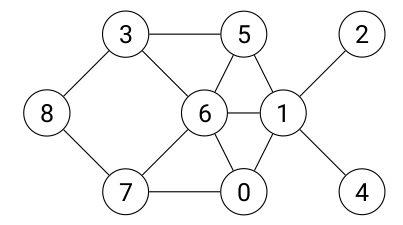

Le graphe peut être résumé par une liste de sommets adjacents :

In [ ]:
G = [
    [1, 6, 7],        # voisins de 0
    [0, 2, 4, 5, 6],  # voisins de 1
    [1],              # voisins de 2
    [5, 6, 8],        # voisins de 3
    [1],              # voisins de 4
    [1, 3, 6],        # voisins de 5
    [0, 1, 3, 5, 7],  # voisins de 6
    [0, 6, 8],        # voisins de 7
    [3, 7]            # voisins de 8
]


Comment parcourir le graphe afin d'atteindre tous ses sommets ?
Voyons l'algorithme suivant :


In [ ]:
def visiter(sommet):
    print(sommet, end=' ')
    # end=' ' permet de finir par un espace au lieu d'un retour à la ligne
    
def parcours(graphe):
    nombreSommets = len(graphe)
    prochainsSommets = []
    prochainsSommets.append(0)
    dejaVu = [False for k in range(nombreSommets)]
    while not(len(prochainsSommets) == 0):
        k = prochainsSommets.pop() # supprime le dernier élément et le stocke en mémoire dans la variable k
        if dejaVu[k]:
            continue # Permet de reprendre la boucle sans exécuter ce qui suit
        dejaVu[k] = True
        visiter(k)
        for s in graphe[k]:
            prochainsSommets.append(s)
            

In [ ]:
# Parcours du graphe G :
parcours(G)


1. Copier le code ci-dessus dans Thonny et exécuter pas à pas pour voir ce qui se produit. 

2. Donner ci-dessous les états successifs de la liste `prochainsSommets`.

*Indications* : On pourra modifier la fonction `parcours` pour y insérer des instructions `print` à chaque modification de la liste (penser aussi à désactiver la fonction `visiter`).

3. Comment évolue la liste `prochainsSommets` d'une étape à l'autre ?

On parle de parcours **en profondeur d'abord** du graphe (*depth-first*) : on avance autant que possible, et on revient sur ses traces pour les sommets qu’on a laissés de côté préalablement.

### B - Construction de la structure de données

Nous allons mettre en place la structure de donnée `Pile` en construisant une classe dédiée.

Cette classe contiendra deux attributs d'instance :
* `pile` : la liste qui correspond à la pile.
* `taille` : la taille de cette pile.

&rarr; La pile est forcément vide à l'initialisation de l'objet.

Les méthodes de classe qui devront être implémentées sont :

* `estVide` : vérifie si la pile est vide
* `empiler` : ajoute un élément en fin de pile (et retourne l'élément empilé avec `return`)
* `depiler` : enlève le dernier élément de la pile (et retourne l'élément dépilé)

4. Compléter la structure suivante :

In [ ]:
class Pile:
    pass


In [ ]:
# Tests 

nouvellePile = Pile()

# Affichage des attributs
nouvellePile.__dict__

# Tester les méthodes ci-dessous


Il n'y a aucune possibilité de visualiser correctement la pile.

5. Créer une méthode `voirPile` qui affiche la pile sous cette forme :

```
|    10    |
|    15    |
|     2    |
|----------|
```
Pour la pile dans cet état : `[2,15,10]`.

6. Faire en sorte que la fonction `voirPile` soit appelée par les fonctions d'empilement et de dépilement (on doit visualiser la pile à chaque fois qu'un élément est empilé ou dépilé).

7. Utiliser la classe `Pile` pour le parcours du graphe G. On modifiera la fonction `parcours` de façon à voir l'évolution de la Pile.

*Indications :* la liste `prochainsSommets` doit désormais être définie comme une instance de la classe `Pile`.

In [ ]:
# Intégrer la nouvelle fonction parcours ici.


À retenir :
<div style="width:80%;border:solid 2px;margin:auto;padding:20px;" markdown="1">
Une pile fonction sur le principe <b>dernier arrivé, premier parti : LIFO</b> (last in first out).
    
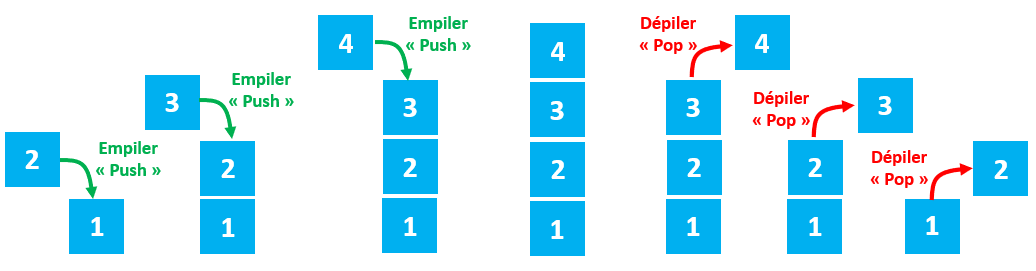
</div>

## II - Autre structure de données : la file
### A - Exemple : parcours de graphe

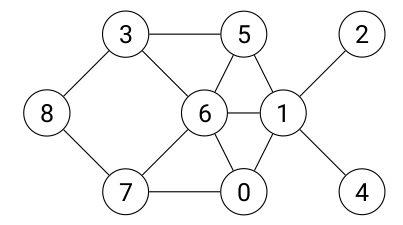

Reprenons le graphe précédent et appliquons le parcours que code l'algorithme suivant :

In [ ]:
def parcours2(graphe):
    nombreSommets = len(graphe)
    prochainsSommets = []
    prochainsSommets.append(0)
    dejaVu = [False for k in range(nombreSommets)]
    while not(len(prochainsSommets) == 0):
        k = prochainsSommets.pop(0)
        if dejaVu[k]:
            continue
        dejaVu[k] = True
        visiter(k)
        for s in graphe[k]:
            prochainsSommets.append(s)
            

In [ ]:
# Parcours du graphe G :
parcours2(G)


8. Copier le code ci-dessus dans Thonny et exécuter pas à pas pour voir ce qui se produit. 

9. Donner ci-dessous les états successifs de la liste `prochainsSommets`.

10. Comment évolue la liste `prochainsSommets` d'une étape à l'autre ?

On parle de parcours **en largeur d'abord** du graphe (*breadth-first*) : après avoir visité un sommet, on attend d'avoir visité tous ses voisins avant de passer à la suite.

### B - Construction de la structure de données

Nous allons mettre en place la structure de donnée `File` en construisant une classe dédiée.

Cette classe contiendra deux attributs d'instance :
* `file` : la liste qui correspond à la file.
* `taille` : la taille de cette file.

&rarr; La file est forcément vide à l'initialisation de l'objet.

Les méthodes de classe qui devront être implémentées sont :

* `estVide` : vérifie si la file est vide
* `enfiler` : ajoute un élément en fin de file (et retourne l'élément enfilé)
* `defiler` : enlève le dernier élément de la file (et retourne l'élément défilé)

11. Compléter la structure suivante :

In [ ]:
class File:
    pass


In [ ]:
# Tests 

nouvelleFile = File()

# Affichage des attributs
nouvelleFile.__dict__

# Tester les méthodes ci-dessous


12. Créer une méthode `voirFile` qui affiche la File sous cette forme :

```
2 ← 15 ← 10 ←
```
Pour la file dans cet état : `[2,15,10]`.

13. Faire en sorte que la fonction `voirFile` soit appelée par les fonctions d'enfilement et de défilement.

13. Utiliser la classe `File` pour le parcours du graphe G. On modifiera la fonction `parcours2` de façon à voir l'évolution de la File.

À retenir :
<div style="width:80%;border:solid 2px;margin:auto;padding:20px;" markdown="1">
Une file fonction sur le principe <b>premier arrivé, premier parti : FIFO</b> (first in first out).

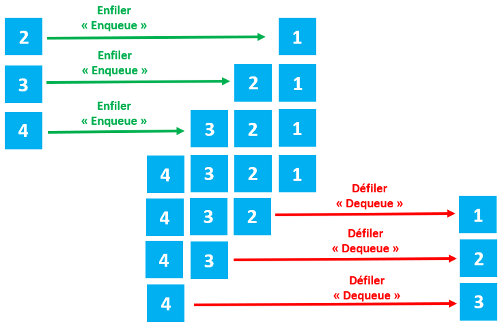

</div>

## III - Pour aller plus loin : pile et récursivité

13. Écrire la fonction récursive `estDansListe` qui permet de vérifier si un élément `e` est dans une liste `L`.

*Astuce* : on pourra utiliser le *slice* de liste `L[1:]` qui permet de renvoyer la sous-liste de `L` à partir de l'index 1.

In [ ]:
# Fonction


In [ ]:
# Tests


14. En quoi la récursivité utilise la notion de pile ?

15. Coder la fonction `minimum` qui permet de déterminer le minimum d'une liste de nombres par récursivité.

In [ ]:
# Fonction


In [ ]:
# Tests


Bibliographie :
* Eduscol : ressources d'accompagnement en NSI
* Simon Cruanes, [Structures de données](https://who.rocq.inria.fr/Simon.Cruanes/enseignement/structures1.pdf), INRIA
* Samuel Risbourg, Structures de données, INRIA
* MoncoachData.com : [structures de données de base en python](https://moncoachdata.com/blog/devenir-python-ninja-structures-de-donnees/)
* Pixees.fr : [Structures de données : les listes, les piles et les files](https://pixees.fr/informatiquelycee/n_site/nsi_term_structDo_liste.html)
* C. Gerland, D. Latouche, Lycée Saint-Exupéry, Mantes-La-Jolie 